## OB1 analyses on the sentence task

In [4]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns
import pickle5 as pickle


### OB1 performance on the sentence reading task (experiment 2)

In [55]:
#df = pd.read_pickle("C:/Users/noors/Downloads/alldata_Sentence.pkl")
#df.head(3)

with open('C:/Users/noors/downloads/alldata_Sentence.pkl', "rb") as fh:
    df = pickle.load(fh)




In [56]:
data2plot = df.copy(deep=True)
data2plot['RT'] = df['reaction time'].str[0]
data2plot['correct'] = df['correct'].str[0]
data2plot['position'] = df['position'].astype(str)

In [57]:
data2plot['item'] = np.where(data2plot['item_nr'] >200 , data2plot['item_nr']-200, data2plot['item_nr'])
data2plot.head(3)



,stimulus,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,RT,item
0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",9,9,0.655094,3.998309,0,[1075],0,1,1,1075,1
1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",9,9,0.800000,0.000000,0,[1075],0,1,2,1075,2
2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.536...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",8,8,0.737891,1.713742,0,[1075],0,1,3,1075,3


In [58]:
data2plot.item.unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

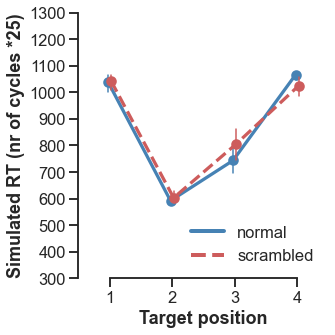

In [59]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
#sns.stripplot(x="position", y="RT", hue="condition",
#               data=data2plot, dodge=False, jitter=True, 
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="RT", hue="condition", linestyles=['-', '--'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5, palette = ['steelblue', 'indianred'],
                scale=0.8,order=["1", "2","3","4"],bw=.2,legend=False)

#sns.lineplot(x="position", y="RT",
 #             data=data2plot)
leg = plt.legend(loc='lower center', labels=['normal', 'scrambled'],frameon=False,labelspacing=0.5, scatterpoints=1, fontsize=13, #colors = ['steelblue', 'indianred']
           )

from matplotlib.patches import Patch
from matplotlib.lines import Line2D


legend_elements = [Line2D([0], [0], color='steelblue', lw=4, label='normal', linestyle='-'),
                   Line2D([0], [0], color='indianred', lw=4, label='scrambled', linestyle='--',
                          markersize=15)]


ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("Simulated RT (nr of cycles *25)",fontdict=dict(weight='bold'))
ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])
ax.legend(handles=legend_elements, loc='lower right',frameon=False)


#ax.legend_.remove()

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)
plt.tight_layout()
#plt.show()


plt.savefig("Sentence_rt_plot.pdf", format='pdf')




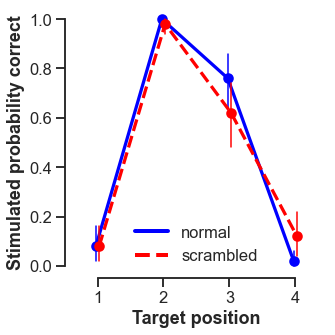

In [60]:
error = {1:0, 0:1}
data2plot['error'] = data2plot["correct"].replace(error, inplace=False)

# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
# sns.stripplot(x="position", y="error",  hue="condition",
#               data=data2plot, dodge=False, jitter=True,
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="correct", hue="condition", linestyles=['-', '--'],palette=['blue', 'red'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5,
                scale=0.8,order=["1", "2","3","4"],bw=.2)

legend_elements = [Line2D([0], [0], color='blue', lw=4, label='normal', linestyle='-'),
                   Line2D([0], [0], color='red', lw=4, label='scrambled', linestyle='--',
                          markersize=15)]

ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("Stimulated probability correct",fontdict=dict(weight='bold'))
ax.legend(handles=legend_elements, loc='lower center',frameon=False)

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.tight_layout()
#plt.show()

plt.savefig("Sentence_performance_plot.pdf", format='pdf')


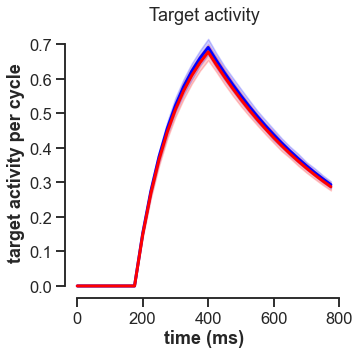

In [44]:
target2plot = df.copy(deep=True)

target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25


target2plot["target activity per cycle"] = pd.to_numeric(target2plot["target activity per cycle"].str[0], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=target2plot, x="time", y="target activity per cycle", hue = "condition",color ='black' , ci=95,  linewidth=3, palette = ['blue', 'red'], legend=False)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("target activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Target activity")

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


### Then for lexicon

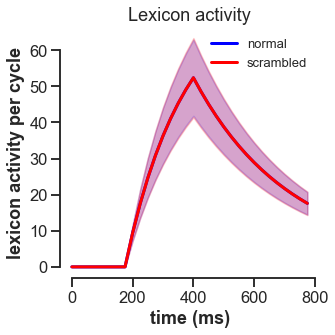

In [45]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", palette = ['blue','red'], legend=False,color ='black' , ci='sd',  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")
plt.legend(loc='upper right', labels=['normal','scrambled'],frameon=False,labelspacing=0.5, scatterpoints=1, fontsize=13)


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.tight_layout()
#plt.show()

#plt.savefig("Sentence_lexicon_plot.pdf", format='pdf')



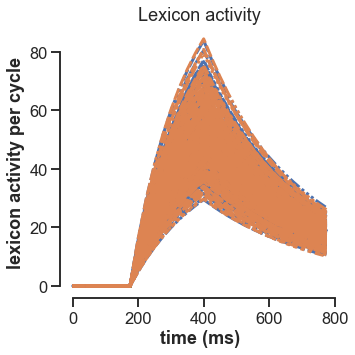

In [61]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

lexicon2plot['item'] = np.where(lexicon2plot['item_nr'] >200 , lexicon2plot['item_nr']-200, lexicon2plot['item_nr'])


# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", style="trial", legend=False,color ='black' , ci=95,  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


In [62]:
lexicon2plot.head(2)

lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

In [63]:
lexicon_peak.head(3)


,trial,stimulus,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,...,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,item,cycle nr,time
16,0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",55.946941,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",9,...,0.655094,3.998309,0,[1075],[0],1,1,1,16,400
48,1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",52.413509,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",9,...,0.800000,0.000000,0,[1075],[0],1,2,2,16,400
80,2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",38.084389,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",8,...,0.737891,1.713742,0,[1075],[0],1,3,3,16,400


,trial,stimulus,word predictability,lexicon activity per cycle,bin,condition,reaction time,correct,item
16,0,les vers sont loin,0,55.946941,7,normal,[1075],[0],1
48,1,ces loups vont voir,0,52.413509,6,normal,[1075],[0],2
80,2,ton mec est vert,0,38.084389,1,normal,[1075],[0],3


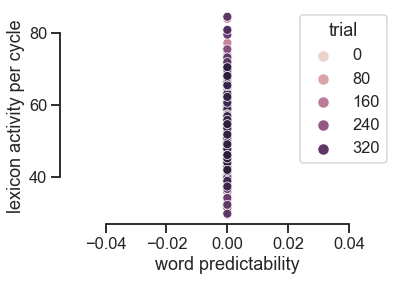

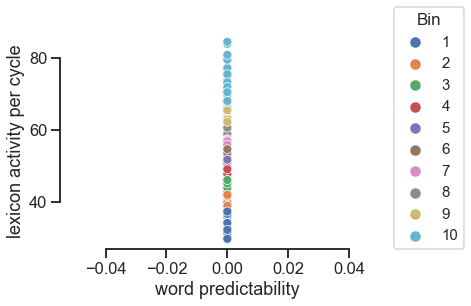

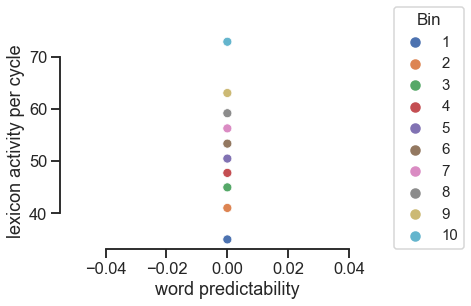

In [64]:
#lexicon_peak
sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['lexicon activity per cycle'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

#lexicon_peak.to_pickle('C:/Users/noors/Downloads/Sentencelexicon.pkl')
sentence_lexicon_peak = lexicon_peak[['trial','stimulus', 'word predictability', 'lexicon activity per cycle', 'bin', 'condition', 'reaction time', 'correct','item']].copy(deep=True)
sentence_lexicon_peak.to_pickle('C:/Users/noors/Downloads/sentence_reading_lexicon_peak.pkl')
sentence_lexicon_peak.head(3)

## Load EEG data

In [66]:
data_path = "E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/"
EEG_files = glob.glob(data_path+'*.fif') # returns 40 EEG files
print('there are %i EEG files' %len(EEG_files))

from scipy.io import loadmat
excluded = [1,3,12] #list of participants to exclude 
all_subj = []
df = pd.DataFrame()

# selection of electrodes - 2 poolings 
elecs=['Fz','Cz','POz']
    
for electrode in elecs: 
    for p in tqdm(range(1,len(EEG_files)+1)):
        
        if p in excluded:  
            continue

        epochs = mne.read_epochs('E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_' + str(p) + '_0108_picks_baseline-epo.fif', verbose=None)
        data = np.squeeze(epochs.get_data(picks=electrode))
        cond_nr = epochs.metadata['eventcodes']
        stimulus = epochs.metadata['item_nr']
        stimlist = epochs.metadata['list']
        corr = epochs.metadata['correct']

        cond = pd.DataFrame(cond_nr)
        cond.reset_index(drop=True, inplace=True)
                
        stim = pd.DataFrame(stimulus)
        stim.reset_index(drop=True, inplace=True)
        
        counterbalance = pd.DataFrame(stimlist)
        counterbalance.reset_index(drop=True, inplace=True)
        
        cor = pd.DataFrame(corr)
        cor.reset_index(drop=True, inplace=True)
    
        df = pd.DataFrame(data)
        df.reset_index(drop=True,inplace=True)
        df['channel_id'] = electrode
        df['subj_idx'] = p
        df['condition'] = cond['eventcodes']
        df['item'] = stim['item_nr']
        df['list'] = counterbalance['list']
        df['correct'] = cor['correct']
        df = df[df['correct']== 1]
        
        df = df.melt(id_vars=['subj_idx','channel_id','condition','item', 'list', 'correct'], var_name='timepoint')
    
        all_subj.append(df)
        
data = pd.concat(all_subj)        
data.head(10)


  0%|          | 0/23 [00:00<?, ?it/s]

there are 23 EEG files
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_2_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
198 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_4_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_5_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying basel

 22%|██▏       | 5/23 [00:00<00:00, 35.86it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_6_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_7_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated


 30%|███       | 7/23 [00:00<00:00, 26.83it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_8_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_9_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_10_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: 

 43%|████▎     | 10/23 [00:00<00:00, 25.37it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_11_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_13_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_14_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
199 matching events found
Applying baseline correction (mode

 65%|██████▌   | 15/23 [00:00<00:00, 28.32it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_16_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_17_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_18_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
199 matching events found
Applying baseline correction (mode

 78%|███████▊  | 18/23 [00:00<00:00, 28.66it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_19_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_20_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_21_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode

 96%|█████████▌| 22/23 [00:00<00:00, 29.16it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_23_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated


  0%|          | 0/23 [00:00<?, ?it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_2_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
198 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_4_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_5_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: m

 26%|██▌       | 6/23 [00:00<00:00, 26.18it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_7_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_8_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_9_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: m

 43%|████▎     | 10/23 [00:00<00:00, 27.29it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_11_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_13_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_14_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
199 matching events found
Applying baseline correction (mode

 61%|██████    | 14/23 [00:00<00:00, 28.99it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_15_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
199 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_16_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_17_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode

 78%|███████▊  | 18/23 [00:00<00:00, 29.63it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_19_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_20_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_21_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode

 96%|█████████▌| 22/23 [00:00<00:00, 30.04it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_23_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated


  0%|          | 0/23 [00:00<?, ?it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_2_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
198 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_4_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_5_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: m

 26%|██▌       | 6/23 [00:00<00:00, 52.79it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_7_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_8_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_9_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: m

 43%|████▎     | 10/23 [00:00<00:00, 45.53it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_11_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_13_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_14_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
199 matching events found
Applying baseline correction (mode

 65%|██████▌   | 15/23 [00:00<00:00, 44.25it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_16_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_17_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_18_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
199 matching events found
Applying baseline correction (mode

 83%|████████▎ | 19/23 [00:00<00:00, 40.69it/s]

Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_20_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_21_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 7 columns
0 projection items activated
Reading E:/Projects/2020_reading/Data/Sentencereading/EEG_preprocessed/pp_22_0108_picks_baseline-epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     996.09 ms
        0 CTF compensation matrices available
200 matching events found
Applying baseline correction (mode

100%|██████████| 23/23 [00:00<00:00, 39.58it/s]


,subj_idx,channel_id,condition,item,list,correct,timepoint,value
0,2,Fz,42,151,2,1,0,0.000009
1,2,Fz,42,170,2,1,0,-0.000005
2,2,Fz,42,165,2,1,0,0.000016
3,2,Fz,31,140,2,1,0,0.000012
4,2,Fz,12,12,2,1,0,0.000003
5,2,Fz,31,136,2,1,0,0.000005
6,2,Fz,12,22,2,1,0,0.000032
7,2,Fz,42,160,2,1,0,0.000013
8,2,Fz,12,2,2,1,0,-0.000010
9,2,Fz,21,98,2,1,0,-0.000003


In [67]:
data2plot = data.copy(deep=True)

data2plot['cond'] = data2plot['condition'].map({11: 'normal',21: 'normal',31: 'normal',41: 'normal', 12 : 'scrambled', 22 : 'scrambled', 32 : 'scrambled', 42 : 'scrambled'})
data2plot['value'] = data2plot['value']*1e6
data2plot['inverse_value']=data2plot['value']*-1e6

data2plot['time']=data2plot['timepoint'].astype(int)*(1.25/320)-0.25
#data2plot = data2plot[data2plot['timepoint']>64]
data2plot.head(-10)

,subj_idx,channel_id,condition,item,list,correct,timepoint,value,cond,inverse_value,time
10075,2,Fz,42,151,2,1,65,11.315545,scrambled,-1.131554e+07,0.003906
10076,2,Fz,42,170,2,1,65,-5.224986,scrambled,5.224986e+06,0.003906
10077,2,Fz,42,165,2,1,65,18.048035,scrambled,-1.804804e+07,0.003906
10078,2,Fz,31,140,2,1,65,4.330875,normal,-4.330875e+06,0.003906
10079,2,Fz,12,12,2,1,65,1.974995,scrambled,-1.974995e+06,0.003906
...,...,...,...,...,...,...,...,...,...,...,...
51505,23,POz,31,118,1,1,319,10.244939,normal,-1.024494e+07,0.996094
51506,23,POz,22,89,1,1,319,-19.304604,scrambled,1.930460e+07,0.996094
51507,23,POz,31,112,1,1,319,0.448551,normal,-4.485511e+05,0.996094
51508,23,POz,11,19,1,1,319,-7.099587,normal,7.099587e+06,0.996094


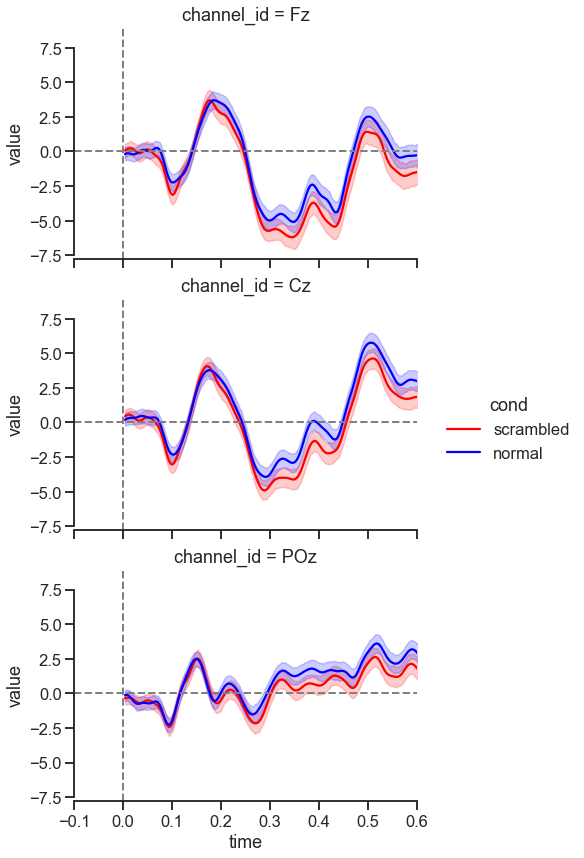

In [68]:
# Plot the responses for different events and regions
erp_plot = sns.relplot(x="time", y="value",ci=95,
             hue="cond",row="channel_id",kind="line",# style="event",
            palette = ['red', 'blue'],
                       legend=True,
             data=data2plot)

erp_plot.set(xlim=(-0.1, 0.6))
erp_plot.set(xticks=[-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
erp_plot.fig.set_figwidth(8.27)
erp_plot.fig.set_figheight(11.7)


for ax in erp_plot.axes.flat:
    ax.axvline(0, ls='--', linewidth=2, color="gray")
    ax.axhline(0, ls='--', linewidth=2, color="gray")

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

### Okay, so now we have a dataframe with the EEG values:

In [69]:
data2plot['item_condition'] =data2plot['item'].astype(str) + data2plot['cond']
data2plot.head(3)

,subj_idx,channel_id,condition,item,list,correct,timepoint,value,cond,inverse_value,time,item_condition
10075,2,Fz,42,151,2,1,65,11.315545,scrambled,-1.131554e+07,0.003906,151scrambled
10076,2,Fz,42,170,2,1,65,-5.224986,scrambled,5.224986e+06,0.003906,170scrambled
10077,2,Fz,42,165,2,1,65,18.048035,scrambled,-1.804804e+07,0.003906,165scrambled


### And a dataframe with the OB1 values:

In [70]:
sentence_lexicon_peak['item_condition'] =sentence_lexicon_peak['item'].astype(str) + sentence_lexicon_peak['condition']
sentence_lexicon_peak.head(-3)


,trial,stimulus,word predictability,lexicon activity per cycle,bin,condition,reaction time,correct,item,item_condition
16,0,les vers sont loin,0,55.946941,7,normal,[1075],[0],1,1normal
48,1,ces loups vont voir,0,52.413509,6,normal,[1075],[0],2,2normal
80,2,ton mec est vert,0,38.084389,1,normal,[1075],[0],3,3normal
112,3,votre reine était bonne,0,75.468285,10,normal,[1075],[0],4,4normal
144,4,votre roi était grand,0,54.791161,6,normal,[1075],[0],5,5normal
...,...,...,...,...,...,...,...,...,...,...
12560,392,peau est cette laide,0,51.700611,5,scrambled,[1075],[0],193,193scrambled
12592,393,roi bon leur ira,0,43.941845,3,scrambled,[1075],[0],194,194scrambled
12624,394,est reine notre juste,0,70.426750,10,scrambled,[1075],[0],195,195scrambled
12656,395,est mur notre rose,0,54.603039,6,scrambled,[1075],[0],196,196scrambled


### Find a way to merge them! We do this by taking the condition (normal vs. scrambled) and item nr into account:

In [73]:

bindict = dict(zip(sentence_lexicon_peak['item_condition'], sentence_lexicon_peak['bin']))
actdict = dict(zip(sentence_lexicon_peak['item_condition'], sentence_lexicon_peak['lexicon activity per cycle']))

data2plot['bin'] = data2plot['item_condition'].map(bindict)
data2plot['OB1 activity'] = data2plot['item_condition'].map(actdict)
data2plot.head(3)

,subj_idx,channel_id,condition,item,list,correct,timepoint,value,cond,inverse_value,time,item_condition,bin,OB1 activity
10075,2,Fz,42,151,2,1,65,11.315545,scrambled,-1.131554e+07,0.003906,151scrambled,3,43.446301
10076,2,Fz,42,170,2,1,65,-5.224986,scrambled,5.224986e+06,0.003906,170scrambled,5,51.236282
10077,2,Fz,42,165,2,1,65,18.048035,scrambled,-1.804804e+07,0.003906,165scrambled,8,58.766766


In [106]:
lexiconN400 = data2plot[(data2plot['time']>.249) & (data2plot['time']< .449)].copy(deep=True)


SpearmanrResult(correlation=-0.6363636363636362, pvalue=0.04791172612997547)
SpearmanrResult(correlation=-0.6, pvalue=0.06668799999999996)
SpearmanrResult(correlation=-0.309090909090909, pvalue=0.38484123026128336)


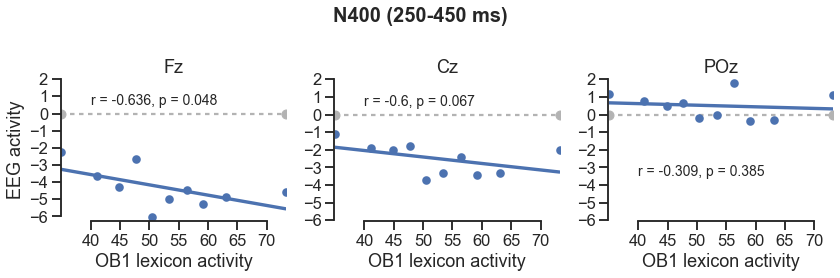

In [116]:
# Show the results of a linear regression within each dataset
sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")

g = sns.lmplot(x="OB1 activity", y="value", col="channel_id", data=lexiconN400.groupby(['bin', 'channel_id'],as_index=False).mean(),
           col_order= ['Fz', 'Cz', 'POz'],#col_wrap=2, 
               palette="muted", height=4 ,x_estimator=np.mean,fit_reg=True,ci=None,
           scatter_kws={"s": 50, "alpha": 1},sharey=False)

g.set(xticks=[40,45,50,55,60,65,70], yticks=[-6,-5,-4,-3,-2,-1,0,1,2])

g.fig.suptitle("N400 (250-450 ms)", size=20, weight="bold")


(g.map(plt.axhline, y=0, color=".7", dashes=(2, 2), zorder=0)
  .set_axis_labels("OB1 lexicon activity", "EEG activity")
  .set_titles("{col_name}")
  .tight_layout(w_pad=1))


fz = lexiconN400[lexiconN400["channel_id"]=="Fz"].groupby(['bin'],as_index=False).mean().copy(deep=True)
[fz_r, fz_p] = scipy.stats.spearmanr(fz['OB1 activity'], fz['value'])
print(scipy.stats.spearmanr(fz['OB1 activity'], fz['value']))


cz = lexiconN400[lexiconN400["channel_id"]=="Cz"].groupby(['bin'],as_index=False).mean().copy(deep=True)
[cz_r, cz_p] = scipy.stats.spearmanr(cz['OB1 activity'], cz['value'])

print(scipy.stats.spearmanr(cz['OB1 activity'], cz['value']))

poz = lexiconN400[lexiconN400["channel_id"]=="POz"].groupby(['bin'],as_index=False).mean().copy(deep=True)
[poz_r, poz_p] = scipy.stats.spearmanr(poz['OB1 activity'], poz['value'])

print(scipy.stats.spearmanr(poz['OB1 activity'], poz['value']))

for i, ax in enumerate(g.fig.axes):
    if i==0:
        ax.text(40, 0.5, "r = " +round(fz_r,3).astype(str) + ", p = " +round(fz_p,3).astype(str), fontsize=14)
    elif i==1:
        ax.text(40, 0.5, "r = " +round(cz_r,3).astype(str) + ", p = " +round(cz_p,3).astype(str), fontsize=14)
    else:
        ax.text(40, -3.5,"r = " +round(poz_r,3).astype(str) + ", p = " +round(poz_p,3).astype(str), fontsize=14)

sns.despine(offset=0.9, trim=True)

SpearmanrResult(correlation=-0.6, pvalue=0.06668799999999996)
SpearmanrResult(correlation=-0.5878787878787878, pvalue=0.07387770688865801)
SpearmanrResult(correlation=-0.18787878787878787, pvalue=0.603217610029209)
